##### Problem Statement: Every year a lot of companies hire a number of employees. The companies invest time and money in training those employees, not just this but there are training programs within the companies for their existing employees as well. The aim of these programs is to increase the effectiveness of their employees. But where HR Analytics fit in this? and is it just about improving the performance of employees?

##### Importing libraries

In [74]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import pandas as pd
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import LabelEncoder
import warnings
warnings.filterwarnings("ignore")
import seaborn as sn
import numpy as np
import scipy.stats as stats
from scipy.stats import zscore
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import f1_score,accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import RidgeClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import LassoLars
from sklearn.linear_model import BayesianRidge
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score,roc_curve
from sklearn.impute import KNNImputer
from sklearn.utils import resample
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.semi_supervised import LabelSpreading,LabelPropagation
from sklearn.ensemble import AdaBoostClassifier
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis,LinearDiscriminantAnalysis
from sklearn.calibration import CalibratedClassifierCV
from sklearn.svm import LinearSVC,NuSVC
from sklearn.linear_model import RidgeClassifierCV,PassiveAggressiveClassifier,Perceptron
from sklearn.naive_bayes import GaussianNB,BernoulliNB
from sklearn.neighbors import NearestCentroid
from sklearn.dummy import DummyClassifier
from io import StringIO
from sklearn.tree import export_graphviz
from IPython.display import Image
import os
from sklearn.feature_selection import SelectKBest,chi2
import joblib
%matplotlib inline

##### Uploading the dataset

In [3]:
df=pd.read_csv('WA_Fn-UseC_-HR-Employee-Attrition.csv')
df

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,...,3,80,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,...,1,80,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,...,2,80,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,...,4,80,0,17,3,2,9,6,0,8


### EDA

In [4]:
print('Number of rows x columns in dataset are:',df.shape)

Number of rows x columns in dataset are: (1470, 35)


In [5]:
print('Dataset contains any null values:',df.isnull().values.any())

Dataset contains any null values: False


In [6]:
df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

##### Attrition is target variable

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

##### OverTime, Over18, MaritalStatus, JobRole, Gender,EducationField,Department,Attrition,BusinessTravel are all of datatype object (string)

##### Convert all categorical into numeric type

<AxesSubplot:xlabel='Attrition', ylabel='count'>

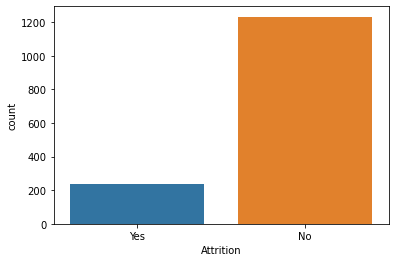

In [10]:
sn.countplot(x='Attrition',data=df)

##### Class Imbalance in Target variable

In [12]:
dicty={}
for i in df[['Attrition']]:
    dicto={}
    for j in range(len(df[i].unique())):
        dicto[df[i].unique()[j]]=j
    dicty[i]=dicto
dicty

{'Attrition': {'Yes': 0, 'No': 1}}

In [13]:
for i in ['Attrition']:
    df[i]=df[i].apply(lambda x:dicty[i][x])

<AxesSubplot:xlabel='BusinessTravel', ylabel='EmployeeCount'>

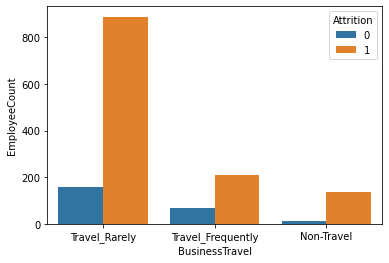

In [15]:
sn.barplot(x = df['BusinessTravel'] , y = df['EmployeeCount'],estimator = np.sum, hue = df['Attrition'])

##### People who has less frequency of travel has less attrition

In [16]:
dicty={}
for i in df[['BusinessTravel']]:
    dicto={}
    for j in range(len(df[i].unique())):
        dicto[df[i].unique()[j]]=j
    dicty[i]=dicto
dicty

{'BusinessTravel': {'Travel_Rarely': 0,
  'Travel_Frequently': 1,
  'Non-Travel': 2}}

In [17]:
for i in ['BusinessTravel']:
    df[i]=df[i].apply(lambda x:dicty[i][x])

<AxesSubplot:xlabel='Department', ylabel='count'>

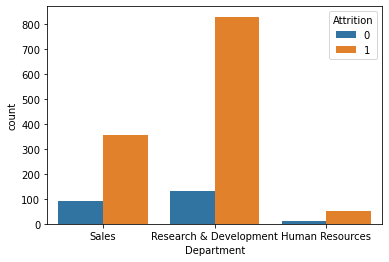

In [18]:
sn.countplot(x = df['Department'],hue=df['Attrition'] , data = df)

##### Sales and R&D department has highest attrition rate 

In [19]:
dicty={}
for i in df[['Department']]:
    dicto={}
    for j in range(len(df[i].unique())):
        dicto[df[i].unique()[j]]=j
    dicty[i]=dicto
dicty

{'Department': {'Sales': 0, 'Research & Development': 1, 'Human Resources': 2}}

In [20]:
for i in ['Department']:
    df[i]=df[i].apply(lambda x:dicty[i][x])

In [22]:
dicty={}
for i in df[['EducationField']]:
    dicto={}
    for j in range(len(df[i].unique())):
        dicto[df[i].unique()[j]]=j
    dicty[i]=dicto
dicty

{'EducationField': {'Life Sciences': 0,
  'Other': 1,
  'Medical': 2,
  'Marketing': 3,
  'Technical Degree': 4,
  'Human Resources': 5}}

In [24]:
for i in ['EducationField']:
    df[i]=df[i].apply(lambda x:dicty[i][x])

<AxesSubplot:xlabel='Education', ylabel='count'>

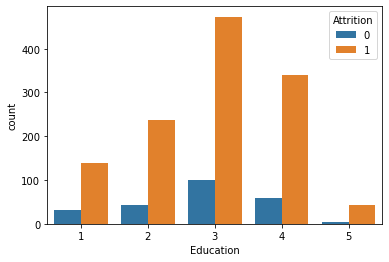

In [25]:
#1-Below College, 2-College, 3-Bachelor, 4-Master, 5-Doctor
sn.countplot(x = df['Education'],hue=df['Attrition'] , data = df)

##### Employee Attrition rate is high for Below College & Bachelor

In [26]:
dicty={}
for i in df[['Gender']]:
    dicto={}
    for j in range(len(df[i].unique())):
        dicto[df[i].unique()[j]]=j
    dicty[i]=dicto
dicty

{'Gender': {'Female': 0, 'Male': 1}}

In [27]:
for i in ['Gender']:
    df[i]=df[i].apply(lambda x:dicty[i][x])

<AxesSubplot:xlabel='Attrition', ylabel='count'>

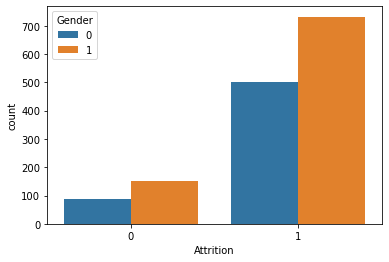

In [28]:
sn.countplot(x= df['Attrition'], data = df, hue = df['Gender'])

##### Employee Attrition rate for Male is higher than Female

In [32]:
dicty={}
for i in df[['JobRole']]:
    dicto={}
    for j in range(len(df[i].unique())):
        dicto[df[i].unique()[j]]=j
    dicty[i]=dicto
dicty

{'JobRole': {'Sales Executive': 0,
  'Research Scientist': 1,
  'Laboratory Technician': 2,
  'Manufacturing Director': 3,
  'Healthcare Representative': 4,
  'Manager': 5,
  'Sales Representative': 6,
  'Research Director': 7,
  'Human Resources': 8}}

In [33]:
for i in ['JobRole']:
    df[i]=df[i].apply(lambda x:dicty[i][x])

<AxesSubplot:xlabel='JobRole', ylabel='count'>

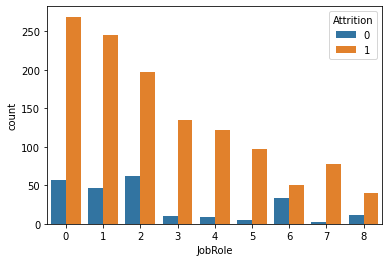

In [34]:
sn.countplot(x = df['JobRole'],hue=df['Attrition'] , data = df)

##### Sales Executive have seebn highest attrition of all

<AxesSubplot:xlabel='MaritalStatus', ylabel='count'>

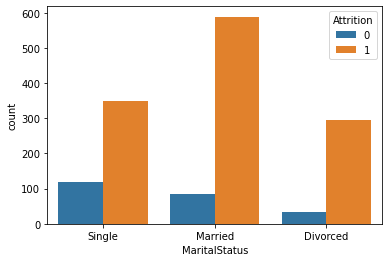

In [35]:
sn.countplot(x = df['MaritalStatus'],hue=df['Attrition'] , data = df)

##### Attrtion rate  is higher in single

In [36]:
dicty={}
for i in df[['MaritalStatus']]:
    dicto={}
    for j in range(len(df[i].unique())):
        dicto[df[i].unique()[j]]=j
    dicty[i]=dicto
dicty

{'MaritalStatus': {'Single': 0, 'Married': 1, 'Divorced': 2}}

In [37]:
for i in ['MaritalStatus']:
    df[i]=df[i].apply(lambda x:dicty[i][x])

In [38]:
dicty={}
for i in df[['Over18']]:
    dicto={}
    for j in range(len(df[i].unique())):
        dicto[df[i].unique()[j]]=j
    dicty[i]=dicto
dicty

{'Over18': {'Y': 0}}

In [39]:
for i in ['Over18']:
    df[i]=df[i].apply(lambda x:dicty[i][x])

<AxesSubplot:xlabel='OverTime', ylabel='count'>

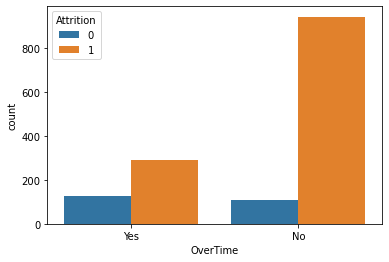

In [40]:
sn.countplot(x = df['OverTime'],hue=df['Attrition'] , data = df)

##### Employees who are doing overtime has higher attrition rate

In [42]:
dicty={}
for i in df[['OverTime']]:
    dicto={}
    for j in range(len(df[i].unique())):
        dicto[df[i].unique()[j]]=j
    dicty[i]=dicto
dicty

{'OverTime': {'Yes': 0, 'No': 1}}

In [43]:
for i in ['OverTime']:
    df[i]=df[i].apply(lambda x:dicty[i][x])

In [44]:
df.Over18.value_counts()

0    1470
Name: Over18, dtype: int64

##### drop column Over18 as it contains no datapoints except for 0(y)

In [45]:
df=df.drop(['Over18'],axis=1)

In [46]:
df.describe()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,0.838776,0.392517,802.485714,0.739456,9.192517,2.912925,1.462585,1.0,1024.865306,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,0.367863,0.665455,403.509100,0.527792,8.106864,1.024165,1.431780,0.0,602.024335,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,0.000000,0.000000,102.000000,0.000000,1.000000,1.000000,0.000000,1.0,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,1.000000,0.000000,465.000000,0.000000,2.000000,2.000000,0.000000,1.0,491.250000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,1.000000,0.000000,802.000000,1.000000,7.000000,3.000000,2.000000,1.0,1020.500000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1.000000,1.000000,1157.000000,1.000000,14.000000,4.000000,2.000000,1.0,1555.750000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1.000000,2.000000,1499.000000,2.000000,29.000000,5.000000,5.000000,1.0,2068.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


###### Employee Count does not have any effect so drop it

In [47]:
df=df.drop(['EmployeeCount'],axis=1)

In [48]:
df.EmployeeNumber.value_counts()

2046    1
641     1
644     1
645     1
647     1
       ..
1364    1
1367    1
1368    1
1369    1
2048    1
Name: EmployeeNumber, Length: 1470, dtype: int64

###### Employee Number contains only one value hence drop it

In [49]:
df=df.drop(['EmployeeNumber'],axis=1)

##### Standard Hours do have same numbers  so drop it

In [50]:
df=df.drop(['StandardHours'],axis=1)

#### Distribution plots

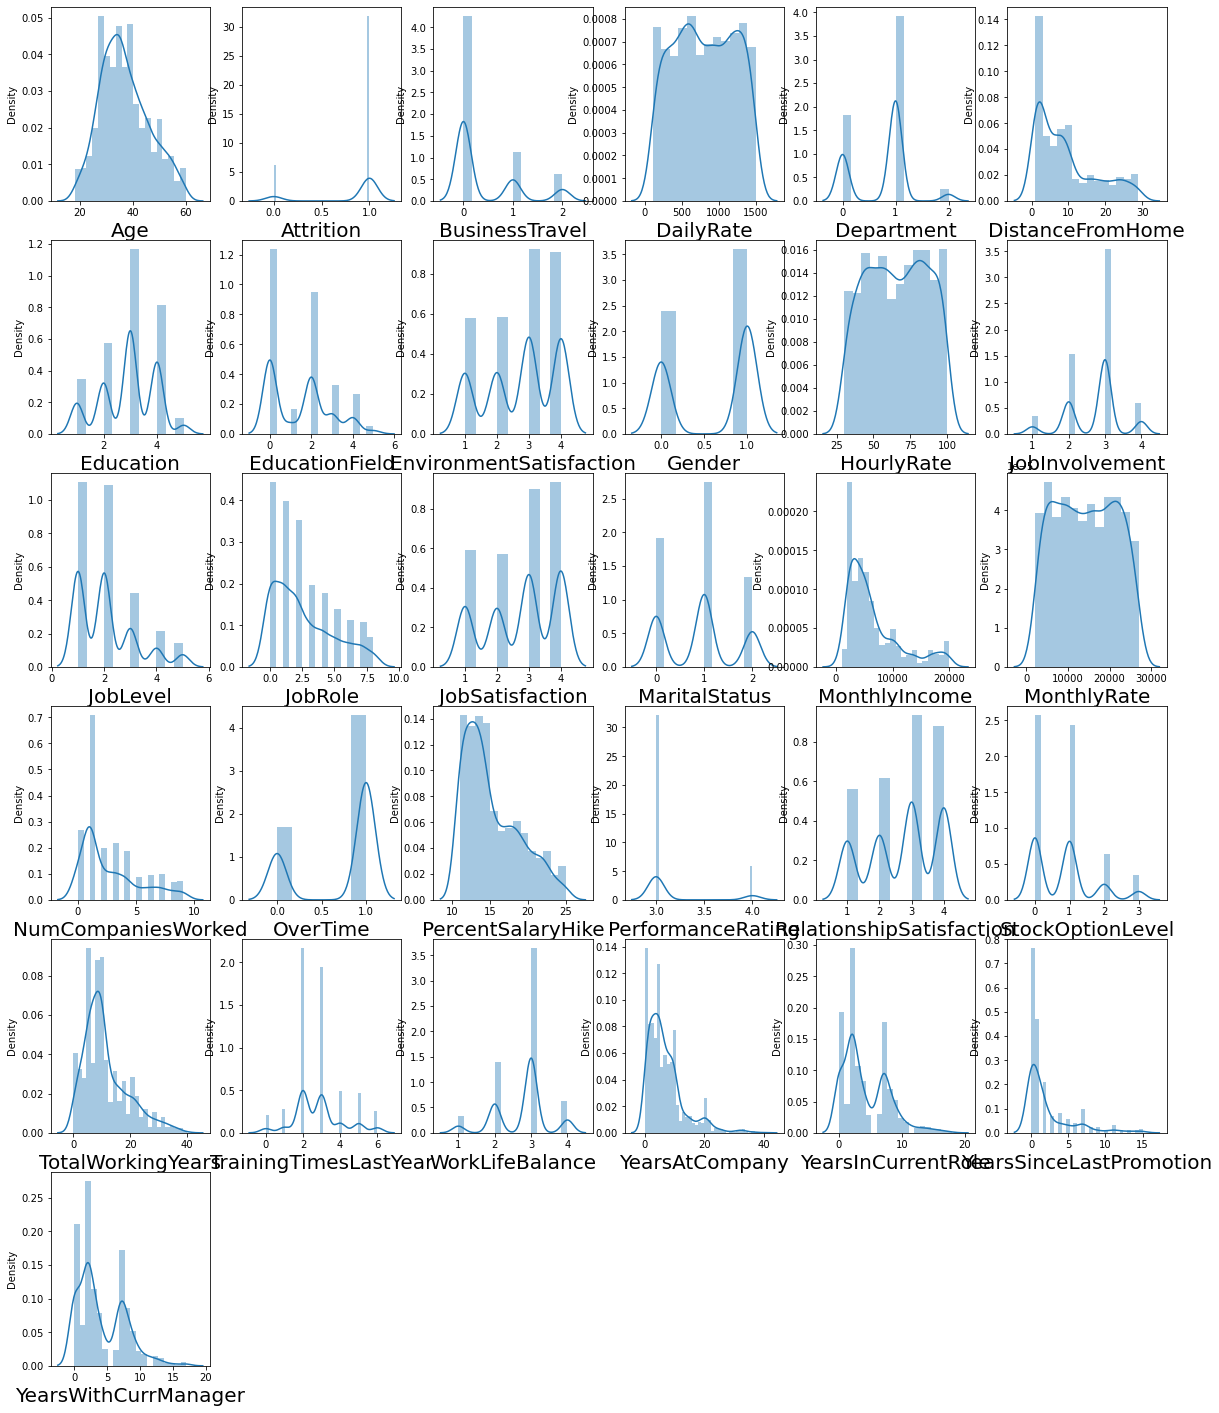

In [55]:
plt.figure(figsize=(20,25),facecolor='white')
plotnumber=1
for column in df.columns:
    if plotnumber<=len(df.columns):
        ax=plt.subplot(6,6,plotnumber)
        sn.distplot(df[column])
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.show()

**Monthly rate, Hourly rate & Daily rate have ractangular plot**

**YearsWithCurrManager, YearsInCurrentRole, WorkLifeBalance, TrainingTimesLastYear, StockOptionLevel, RelationshipSatisfaction, PerformanceRating, OverTime, JobSatisfaction, MaritalStatus, JobLevel, JobInvolvement, Gender, EnvironmentSatisfaction, EducationField, Education, Department, BusinessTravel, Attrition have bimodial plot**

**YearsSinceLastPromotion (Positively skewed), YearsAtCompany (Positively skewed),TotalWorkingYears (Positively skewed), PercentSalaryHike (Positively skewed), NumCompaniesWorked (Positively skewed), MonthlyIncome (Positively skewed), JobRole (Positively skewed), DistanceFromHome (Positively skewed), Age**

In [52]:
print('Number of attrition status yes are:',df['Attrition'].value_counts()[0])
print('Number of attrition status no are:',df['Attrition'].value_counts()[1])
print('Unbalanced dataset' if df['Attrition'].value_counts()[0]!=df['Attrition'].value_counts()[1] else 'Balanced dataset')

Number of attrition status yes are: 237
Number of attrition status no are: 1233
Unbalanced dataset


In [53]:
dfmin=df[df['Attrition']==0]
dfmax=df[df['Attrition']==1]
dfminup=resample(dfmin,replace=True,n_samples=1233,random_state=123)
dff=pd.concat([dfmax, dfminup])
dff

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
1,49,1,1,279,1,8,1,0,3,1,...,4,4,1,10,3,3,10,7,1,7
3,33,1,1,1392,1,3,4,0,4,0,...,3,3,0,8,3,3,8,7,3,0
4,27,1,0,591,1,2,1,2,1,1,...,3,4,1,6,3,3,2,2,2,2
5,32,1,1,1005,1,2,2,0,4,1,...,3,3,0,8,2,2,7,7,3,6
6,59,1,0,1324,1,3,3,2,3,0,...,4,1,3,12,3,2,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
127,19,0,0,528,0,22,1,3,4,1,...,3,4,0,0,2,2,0,0,0,0
706,40,0,2,1479,0,24,3,0,2,0,...,3,4,0,22,2,2,1,0,0,0
453,26,0,1,426,2,17,4,0,2,0,...,3,2,1,8,2,2,7,7,1,0
725,35,0,0,622,1,14,4,1,3,1,...,4,4,1,5,2,1,4,2,0,2


In [54]:
print('Number of attrition status yes are:',dff['Attrition'].value_counts()[0])
print('Number of attrition status no are:',dff['Attrition'].value_counts()[1])
print('Unbalanced dataset' if dff['Attrition'].value_counts()[0]!=dff['Attrition'].value_counts()[1] else 'Balanced dataset')

Number of attrition status yes are: 1233
Number of attrition status no are: 1233
Balanced dataset


##### Outliers Check

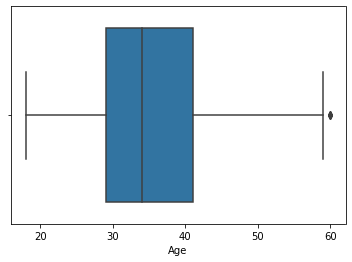

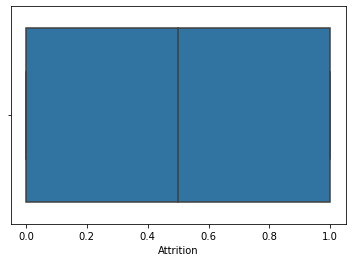

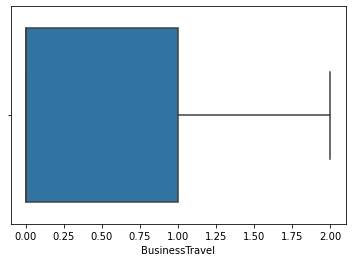

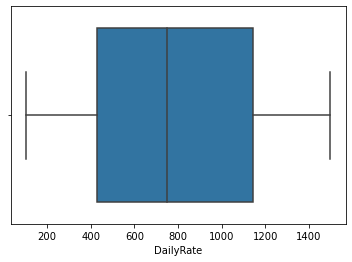

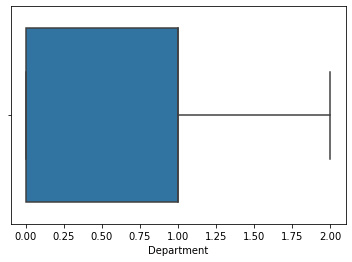

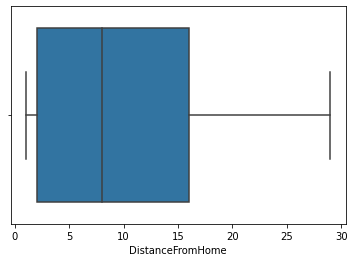

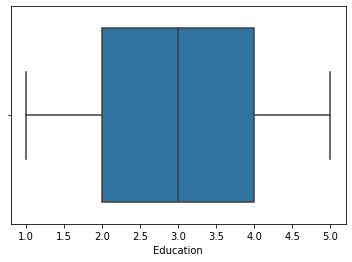

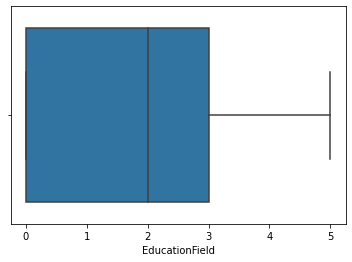

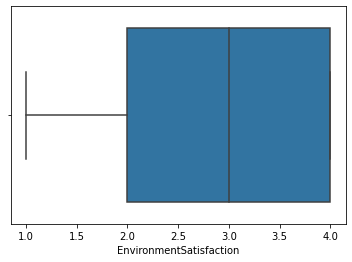

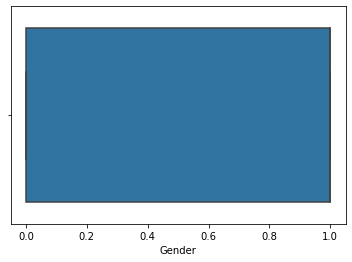

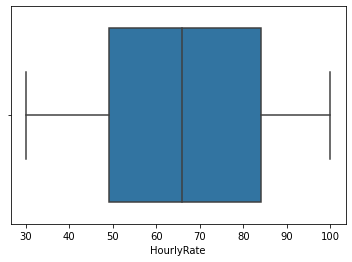

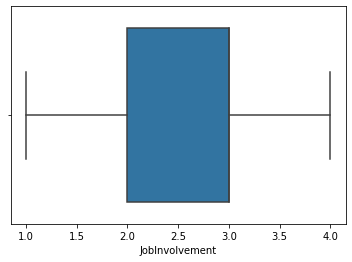

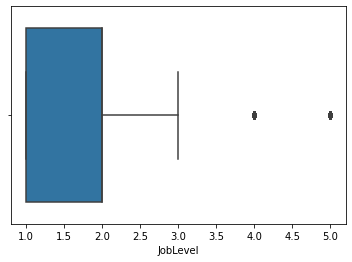

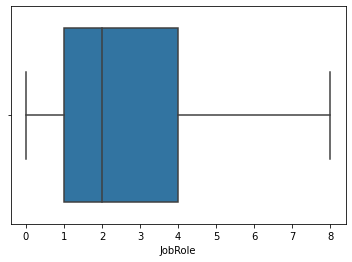

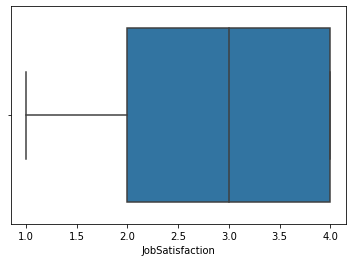

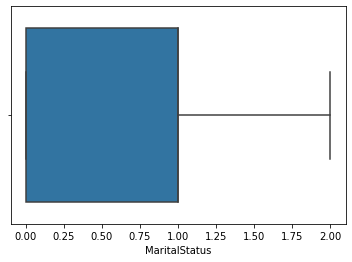

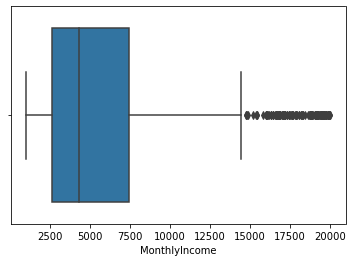

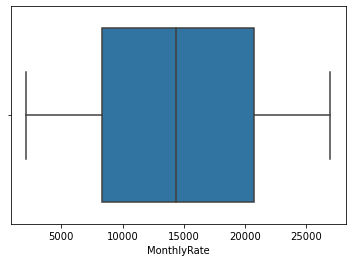

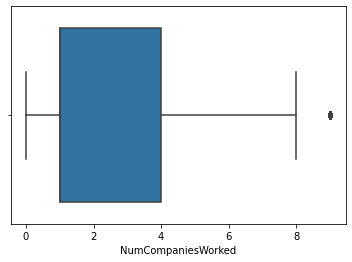

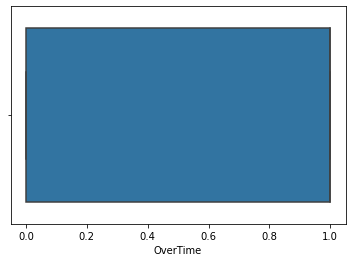

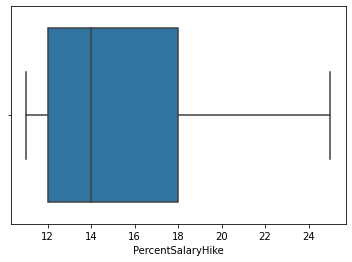

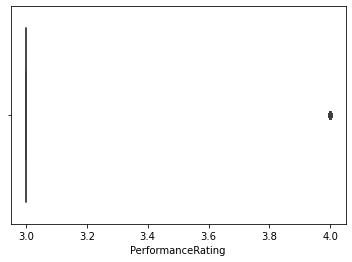

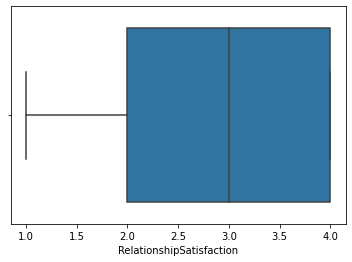

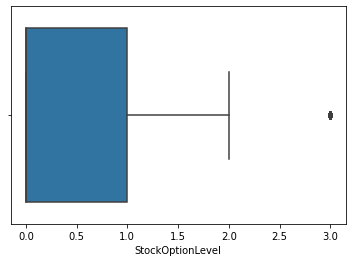

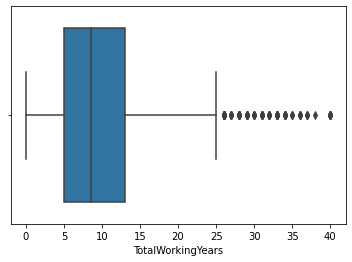

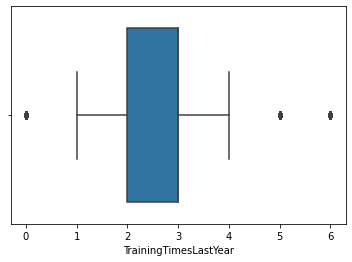

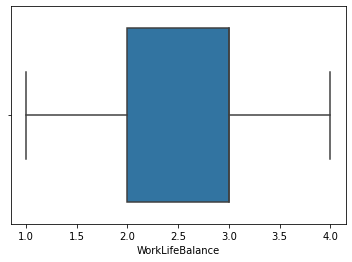

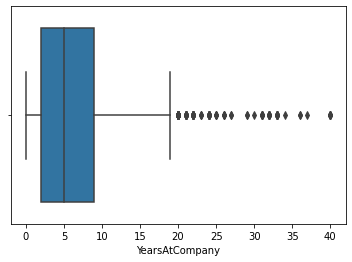

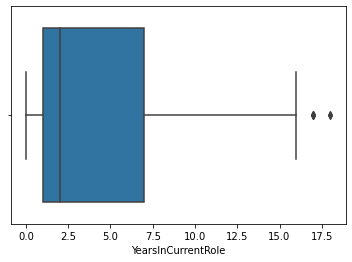

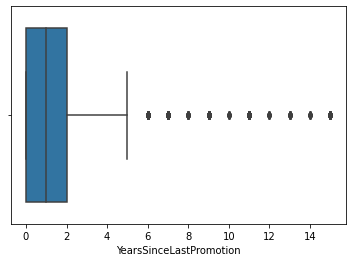

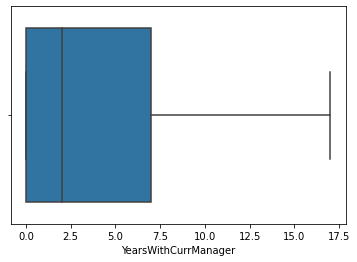

In [56]:
for i in dff.columns:
    sn.boxplot(dff[i])
    plt.show()

##### All the categorical /non categorical type column have valid outliers as they are Natural Variation of datapoints, hence no need to remove outliers

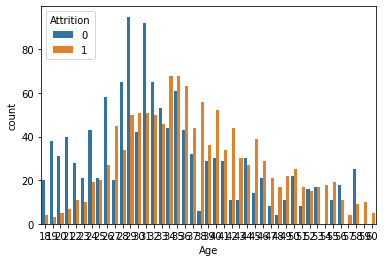

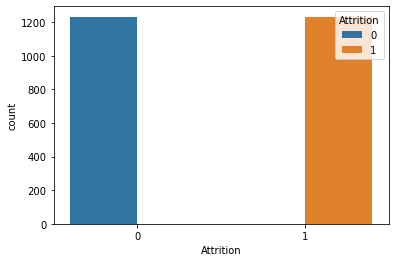

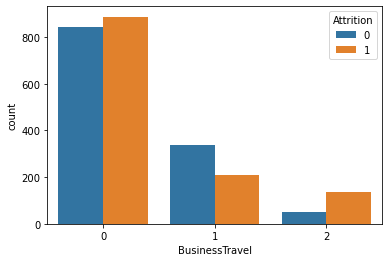

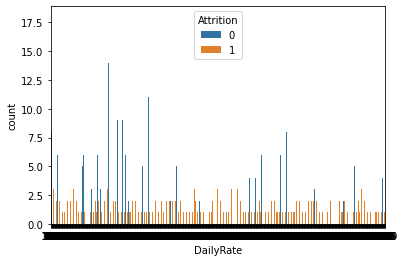

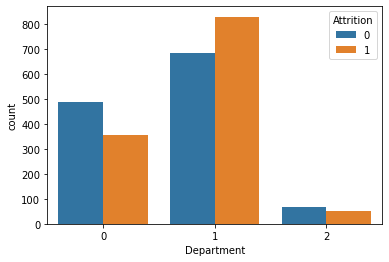

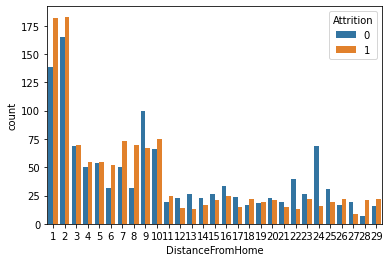

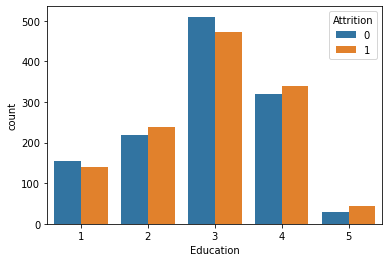

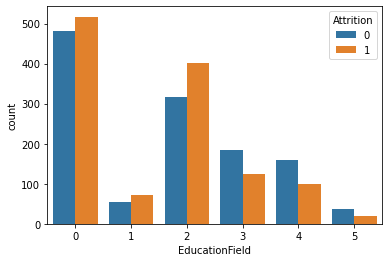

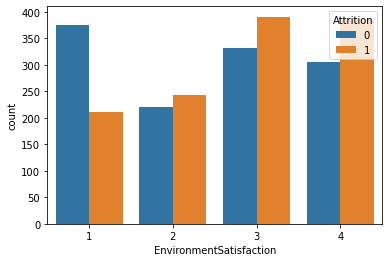

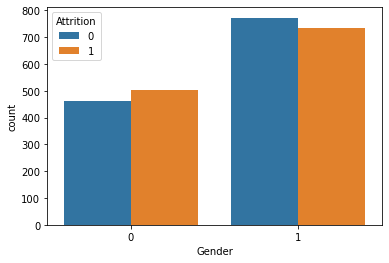

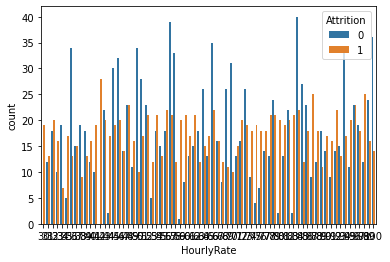

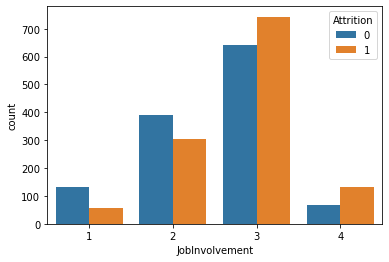

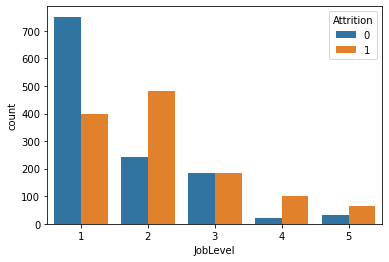

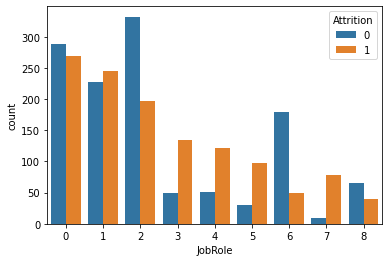

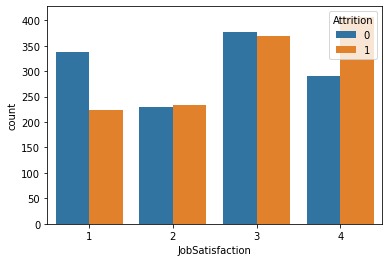

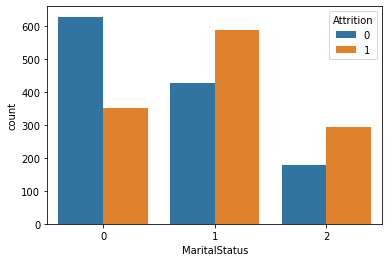

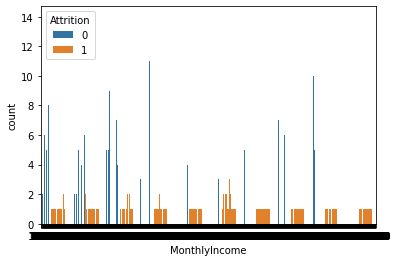

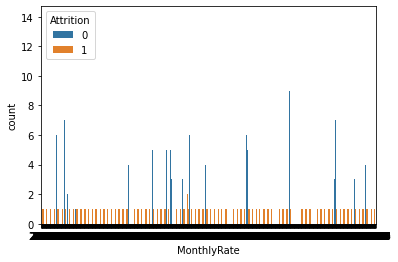

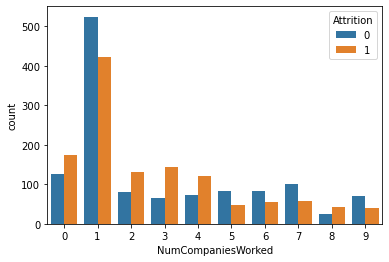

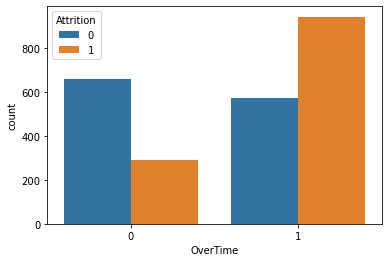

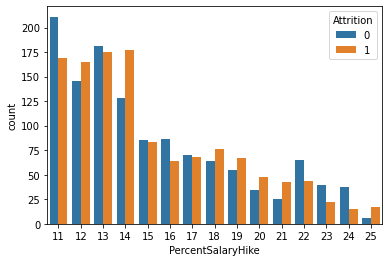

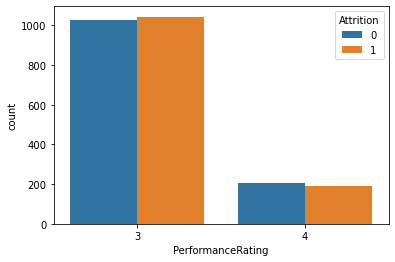

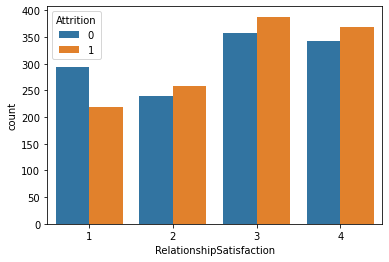

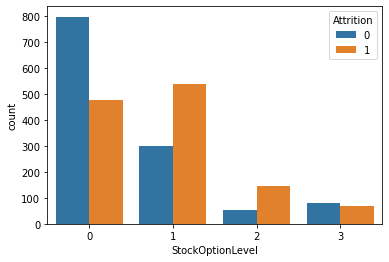

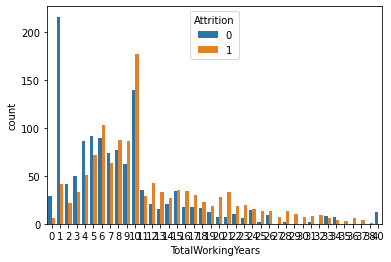

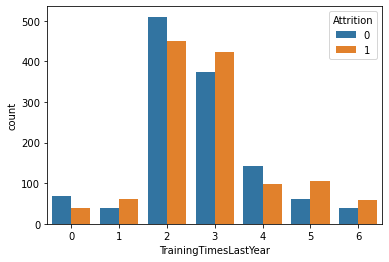

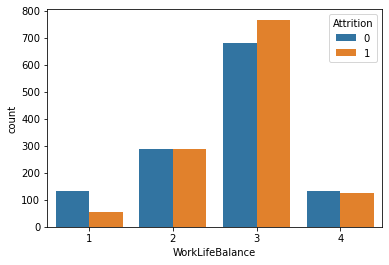

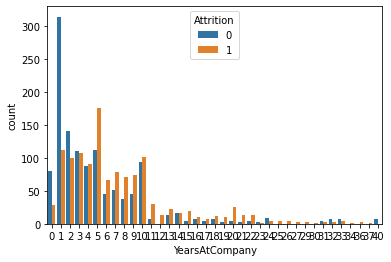

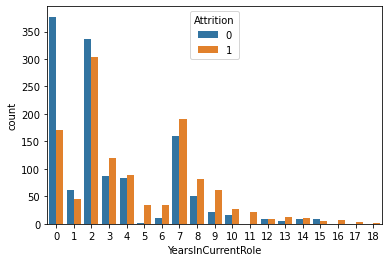

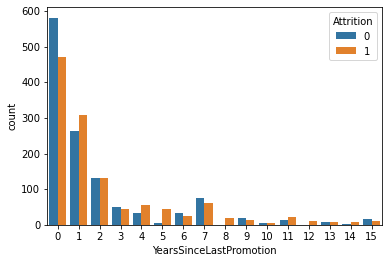

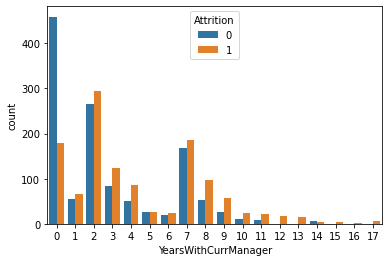

In [57]:
for i in dff.columns:
    sn.countplot(x=i,hue="Attrition",data=dff)
    plt.show()

##### every categorical column and its effect towards the attrition value

##### performance rating, gender, education vs attrition we can see that these columns are unable to distinguish between attrition yes and no. Meaning it does not provide much impact to the model. drop columns if required 

##### Correlation Check

In [58]:
dff.corr()['Attrition']

Age                         0.220809
Attrition                   1.000000
BusinessTravel              0.027322
DailyRate                   0.071597
Department                  0.086318
DistanceFromHome           -0.098512
Education                   0.022694
EducationField             -0.086408
EnvironmentSatisfaction     0.137919
Gender                     -0.033254
HourlyRate                 -0.003675
JobInvolvement              0.166477
JobLevel                    0.228875
JobRole                     0.020650
JobSatisfaction             0.122939
MaritalStatus               0.216247
MonthlyIncome               0.222801
MonthlyRate                -0.022438
NumCompaniesWorked         -0.058776
OverTime                    0.309978
PercentSalaryHike          -0.008751
PerformanceRating          -0.020964
RelationshipSatisfaction    0.057079
StockOptionLevel            0.183523
TotalWorkingYears           0.243382
TrainingTimesLastYear       0.066594
WorkLifeBalance             0.080523
Y

<AxesSubplot:>

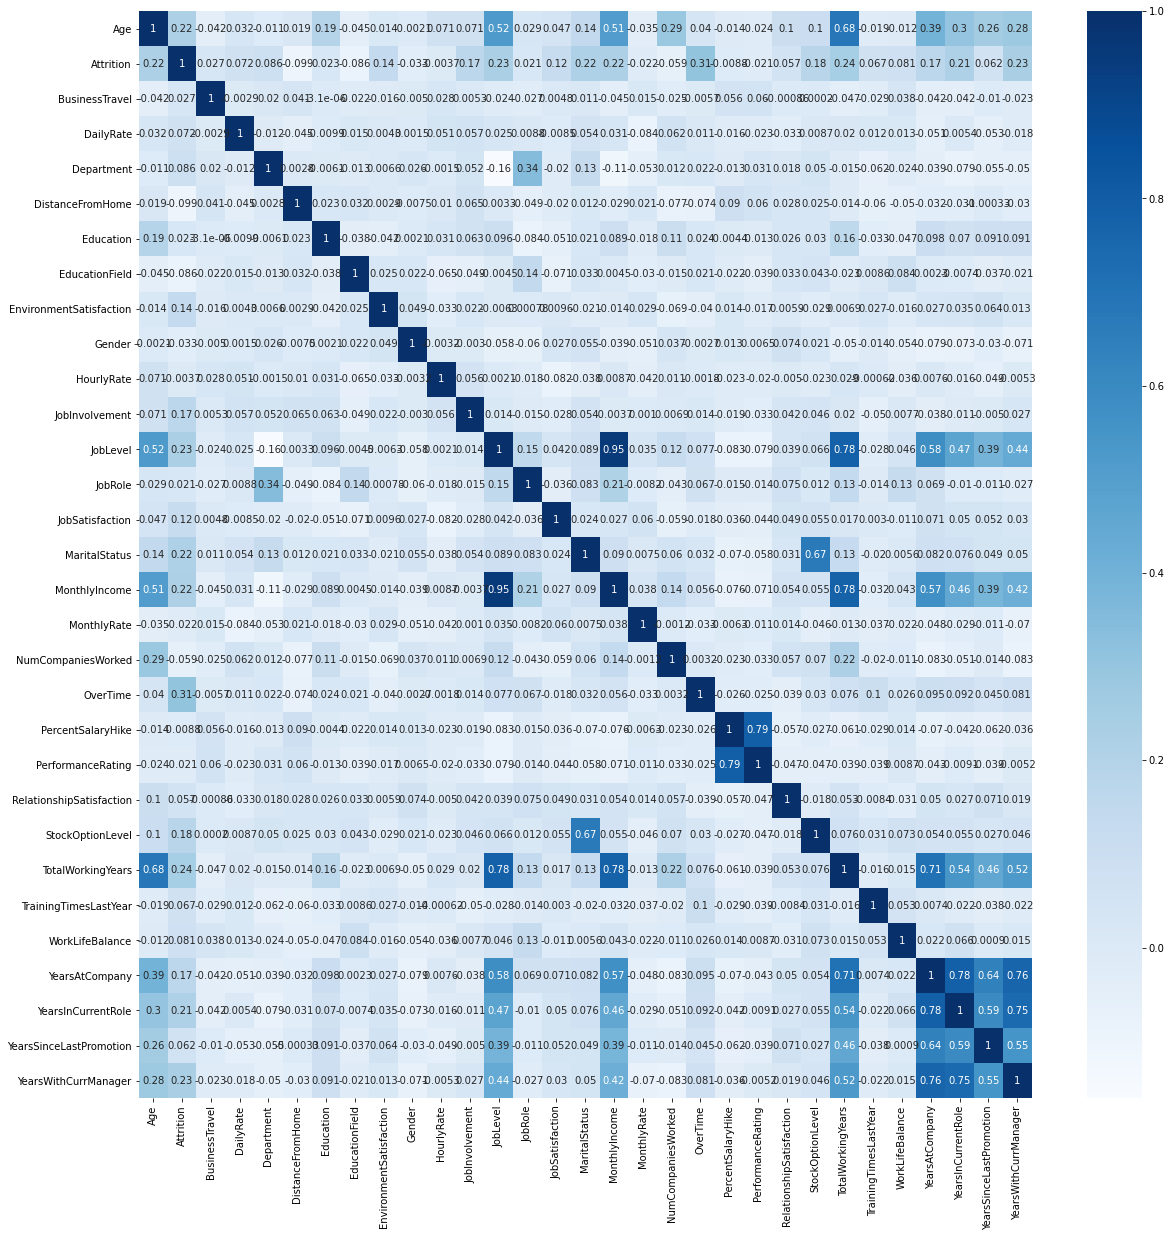

In [59]:
plt.figure(figsize=[20,20])
sn.heatmap(dff.corr(),annot=True,cmap='Blues')

##### dropping columns such as performance rating, gender, education, BusinessTravel & hourly rate

In [60]:
dff=dff.drop(['PerformanceRating','HourlyRate','BusinessTravel','Gender','Education'],axis=1)
dff

,Age,Attrition,DailyRate,Department,DistanceFromHome,EducationField,EnvironmentSatisfaction,JobInvolvement,JobLevel,JobRole,...,PercentSalaryHike,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
1,49,1,279,1,8,0,3,2,2,1,...,23,4,1,10,3,3,10,7,1,7
3,33,1,1392,1,3,0,4,3,1,1,...,11,3,0,8,3,3,8,7,3,0
4,27,1,591,1,2,2,1,3,1,2,...,12,4,1,6,3,3,2,2,2,2
5,32,1,1005,1,2,0,4,3,1,2,...,13,3,0,8,2,2,7,7,3,6
6,59,1,1324,1,3,2,3,4,1,2,...,20,1,3,12,3,2,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
127,19,0,528,0,22,3,4,3,1,6,...,19,4,0,0,2,2,0,0,0,0
706,40,0,1479,0,24,0,2,4,4,0,...,16,4,0,22,2,2,1,0,0,0
453,26,0,426,2,17,0,2,3,1,8,...,11,2,1,8,2,2,7,7,1,0
725,35,0,622,1,14,1,3,2,1,2,...,24,4,1,5,2,1,4,2,0,2


In [61]:
y = dff[['Attrition']].values
x = dff.drop(columns = ['Attrition'])

##### Skewness Check

In [62]:
print(x.skew())

Age                         0.491247
DailyRate                   0.083470
Department                 -0.013575
DistanceFromHome            0.800575
EducationField              0.430675
EnvironmentSatisfaction    -0.200299
JobInvolvement             -0.476317
JobLevel                    1.192094
JobRole                     0.815161
JobSatisfaction            -0.235453
MaritalStatus               0.346043
MonthlyIncome               1.560788
MonthlyRate                 0.025766
NumCompaniesWorked          0.957681
OverTime                   -0.471921
PercentSalaryHike           0.806837
RelationshipSatisfaction   -0.256778
StockOptionLevel            1.224375
TotalWorkingYears           1.315258
TrainingTimesLastYear       0.512230
WorkLifeBalance            -0.569872
YearsAtCompany              2.098238
YearsInCurrentRole          1.043677
YearsSinceLastPromotion     2.106248
YearsWithCurrManager        0.911605
dtype: float64


In [63]:
print(len(x.skew().loc[x.skew()>0.55]))

12


In [64]:
for index in x.skew().index:
    if x.skew().loc[index] >0.55:
        x[index]=np.cbrt(x[index])

In [65]:
print(len(x.skew().loc[x.skew()>0.55]))

3


##### Find the best features

In [66]:
bestfeatures = SelectKBest(score_func=chi2, k=10)
fit = bestfeatures.fit(x,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(x.columns)
#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns
print(featureScores.nlargest(10,'Score'))

                   Specs        Score
12           MonthlyRate  4412.505735
1              DailyRate  2653.223050
0                    Age   306.601455
11         MonthlyIncome   143.974317
14              OverTime    91.282322
24  YearsWithCurrManager    90.056020
17      StockOptionLevel    88.765602
10         MaritalStatus    79.202041
22    YearsInCurrentRole    60.949706
18     TotalWorkingYears    37.214550


In [67]:
newdf=x[['MonthlyRate','DailyRate','Age','MonthlyIncome','OverTime','YearsWithCurrManager','StockOptionLevel','MaritalStatus','YearsInCurrentRole','TotalWorkingYears']]
newdf

,MonthlyRate,DailyRate,Age,MonthlyIncome,OverTime,YearsWithCurrManager,StockOptionLevel,MaritalStatus,YearsInCurrentRole,TotalWorkingYears
1,24907,279,49,17.246691,1,1.912931,1.00000,1,1.912931,2.154435
3,23159,1392,33,14.275168,0,0.000000,0.00000,1,1.912931,2.000000
4,16632,591,27,15.136531,1,1.259921,1.00000,1,1.259921,1.817121
5,11864,1005,32,14.530653,1,1.817121,0.00000,0,1.912931,2.000000
6,9964,1324,59,13.873001,0,0.000000,1.44225,1,0.000000,2.289428
...,...,...,...,...,...,...,...,...,...,...
127,26820,528,19,11.876039,0,0.000000,0.00000,0,0.000000,0.000000
706,17071,1479,40,23.629734,0,0.000000,0.00000,0,0.000000,2.802039
453,22808,426,26,13.994896,0,0.000000,1.00000,2,1.912931,2.000000
725,10074,622,35,15.526490,0,1.259921,1.00000,2,1.259921,1.709976


##### Feature Scaling

In [68]:
scaler = StandardScaler()
newdf[['MonthlyRate','MonthlyIncome','DailyRate']] = scaler.fit_transform(newdf[['MonthlyRate','MonthlyIncome','DailyRate']])
newdf

,MonthlyRate,DailyRate,Age,MonthlyIncome,OverTime,YearsWithCurrManager,StockOptionLevel,MaritalStatus,YearsInCurrentRole,TotalWorkingYears
1,1.463648,-1.244032,49,0.044000,1,1.912931,1.00000,1,1.912931,2.154435
3,1.219534,1.500642,33,-0.698106,0,0.000000,0.00000,1,1.912931,2.000000
4,0.308014,-0.474636,27,-0.482990,1,1.259921,1.00000,1,1.259921,1.817121
5,-0.357855,0.546294,32,-0.634301,1,1.817121,0.00000,0,1.912931,2.000000
6,-0.623197,1.332953,59,-0.798543,0,0.000000,1.44225,1,0.000000,2.289428
...,...,...,...,...,...,...,...,...,...,...
127,1.730806,-0.629995,19,-1.297263,0,0.000000,0.00000,0,0.000000,0.000000
706,0.369322,1.715185,40,1.638097,0,0.000000,0.00000,0,0.000000,2.802039
453,1.170515,-0.881528,26,-0.768101,0,0.000000,1.00000,2,1.912931,2.000000
725,-0.607835,-0.398189,35,-0.385602,0,1.259921,1.00000,2,1.259921,1.709976


### Model Evaluation

In [69]:
models=[LogisticRegression(),DecisionTreeClassifier(),KNeighborsClassifier(),RandomForestClassifier(),SVC(),RidgeClassifier(),
        BaggingClassifier(),GradientBoostingClassifier(),SGDClassifier(),
       LGBMClassifier(),XGBClassifier(),ExtraTreesClassifier(),LabelSpreading(),LabelPropagation(),AdaBoostClassifier(),
       QuadraticDiscriminantAnalysis(),CalibratedClassifierCV(),LinearSVC(),NuSVC(),
       LinearDiscriminantAnalysis(),RidgeClassifierCV(),GaussianNB(),BernoulliNB(),
        PassiveAggressiveClassifier(),Perceptron(),DummyClassifier()]

In [70]:
for i in models:
    x_train,x_test,y_train,y_test=train_test_split(newdf,y,random_state = 42,test_size=0.20,stratify=y)
    scores=cross_val_score(i,x_train,y_train,cv=5,scoring='roc_auc')
    score=np.mean(scores)
    i.fit(x_train,y_train)
    y_pred=i.predict(x_test)
    if roc_auc_score(y_test,y_pred)>score:
        diff=roc_auc_score(y_test,y_pred)-score
        print('roc bigger')
    else:
        diff=score-roc_auc_score(y_test,y_pred)
    print('--'*10)
    print(i)
    print('score',score)
    print('roc',roc_auc_score(y_test,y_pred))
    print('diff',diff)

--------------------
LogisticRegression()
score 0.7734509411671926
roc 0.7246963562753036
diff 0.048754584891889
roc bigger
--------------------
DecisionTreeClassifier()
score 0.8874301389529815
roc 0.9190283400809718
diff 0.03159820112799028
--------------------
KNeighborsClassifier()
score 0.8451587690140604
roc 0.805668016194332
diff 0.03949075281972836
--------------------
RandomForestClassifier()
score 0.9880285110373492
roc 0.9574898785425101
diff 0.030538632494839124
--------------------
SVC()
score 0.721911532027742
roc 0.6457489878542509
diff 0.07616254417349111
--------------------
RidgeClassifier()
score 0.7730863480328811
roc 0.7327935222672065
diff 0.04029282576567461
--------------------
BaggingClassifier()
score 0.9772200736526022
roc 0.9331983805668017
diff 0.044021693085800506
--------------------
GradientBoostingClassifier()
score 0.9076717599869447
roc 0.840080971659919
diff 0.0675907883270257
--------------------
SGDClassifier()
score 0.7608245353897136
roc 0.724696

### ExtraTreesClassifier is best model

### Hyperparamter tuning

In [71]:
parameters={'criterion':['gini', 'entropy'],'max_features':['auto', 'sqrt', 'log2'],'max_depth':[2,8,16,32,50],'class_weight':['balanced', 'balanced_subsample']}
clf = GridSearchCV(ExtraTreesClassifier(), parameters, cv=5,scoring="roc_auc",n_jobs=-1, verbose=1)
clf.fit(newdf,y)
clf.best_params_

Fitting 5 folds for each of 60 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    7.8s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:   24.4s
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:   36.6s finished


{'class_weight': 'balanced',
 'criterion': 'entropy',
 'max_depth': 32,
 'max_features': 'sqrt'}

##### Finding best random state

In [77]:
maxAccu=0
maxRS=0
for i in range(1,100):
    x_train,x_test,y_train,y_test=train_test_split(newdf,y,test_size=.2,random_state=i)
    mod= ExtraTreesClassifier(max_depth=32,criterion='entropy',max_features='sqrt',class_weight='balanced')
    mod.fit(x_train,y_train)
    pred=mod.predict(x_test)
    acc=accuracy_score(y_test,pred)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print ('best r2 score is',maxAccu,'on random state',maxRS)

best r2 score is 0.9878542510121457 on random state 7


In [78]:
x_train, x_test, y_train, y_test = train_test_split(newdf, y,random_state = 7,test_size=0.20,stratify=y)
model=ExtraTreesClassifier(max_depth=30,criterion='entropy',max_features='sqrt',class_weight='balanced')
model.fit(x_train,y_train)
y_pred=model.predict(x_test)

In [82]:
print("Confusion matrix \n",confusion_matrix(y_test,y_pred))
print("f1 score is : ",f1_score(y_test,y_pred))
print("classification report \n",classification_report(y_test,y_pred))
print("AUC ROC Score: ",roc_auc_score(y_test,y_pred))
scores=cross_val_score(model,newdf,y,cv=5,scoring='roc_auc')
score=np.mean(scores)
std=np.std(scores)
print('CV mean',score)
print('std:',std)

Confusion matrix 
 [[247   0]
 [ 20 227]]
f1 score is :  0.9578059071729957
classification report 
               precision    recall  f1-score   support

           0       0.93      1.00      0.96       247
           1       1.00      0.92      0.96       247

    accuracy                           0.96       494
   macro avg       0.96      0.96      0.96       494
weighted avg       0.96      0.96      0.96       494

AUC ROC Score:  0.9595141700404859
CV mean 0.9928551924965887
std: 0.003772196618689179


### AUC ROC curve

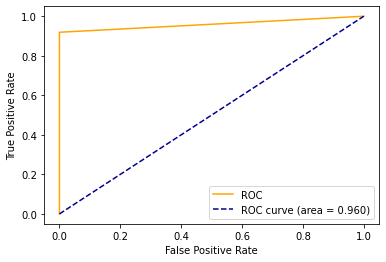

In [83]:
fpr, tpr, threshold = roc_curve(y_test,y_pred)
auc = roc_auc_score(y_test,y_pred)
plt.plot(fpr, tpr, color ='orange', label ='ROC')
plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--', label ='ROC curve (area = %0.3f)'% auc)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

##### Actual vs Predicted

In [85]:
y_pred=model.predict(newdf)
data=dff.drop(['Attrition'],axis=1)
data['Pred']=y_pred
data['Attrition']=dff[['Attrition']]
data

,Age,DailyRate,Department,DistanceFromHome,EducationField,EnvironmentSatisfaction,JobInvolvement,JobLevel,JobRole,JobSatisfaction,...,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Pred,Attrition
1,49,279,1,8,0,3,2,2,1,2,...,1,10,3,3,10,7,1,7,1,1
3,33,1392,1,3,0,4,3,1,1,3,...,0,8,3,3,8,7,3,0,1,1
4,27,591,1,2,2,1,3,1,2,2,...,1,6,3,3,2,2,2,2,1,1
5,32,1005,1,2,0,4,3,1,2,4,...,0,8,2,2,7,7,3,6,1,1
6,59,1324,1,3,2,3,4,1,2,1,...,3,12,3,2,1,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
127,19,528,0,22,3,4,3,1,6,3,...,0,0,2,2,0,0,0,0,0,0
706,40,1479,0,24,0,2,4,4,0,2,...,0,22,2,2,1,0,0,0,0,0
453,26,426,2,17,0,2,3,1,8,3,...,1,8,2,2,7,7,1,0,0,0
725,35,622,1,14,1,3,2,1,2,2,...,1,5,2,1,4,2,0,2,0,0


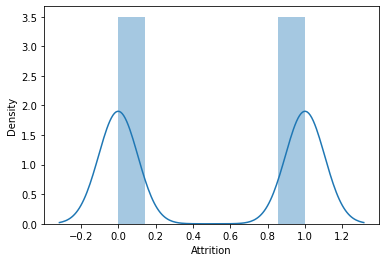

<AxesSubplot:xlabel='Pred', ylabel='Density'>

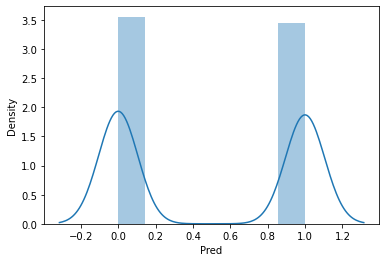

In [86]:
sn.distplot(data['Attrition'])
plt.show()
sn.distplot(data['Pred'])

<AxesSubplot:>

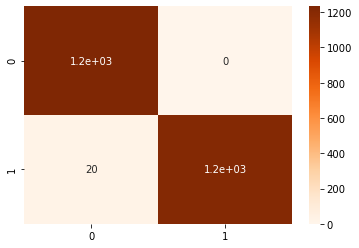

In [87]:
sn.heatmap(confusion_matrix(data['Attrition'],data['Pred']),annot=True,cmap="Oranges",xticklabels=model.classes_
               ,yticklabels=model.classes_)

#### Saving Best model

In [88]:
joblib.dump(model, 'HR_attrition.pkl')

['HR_attrition.pkl']